<a href="https://colab.research.google.com/github/nabilasyukrii/Credit-Scoring-/blob/main/Homecredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
data = pd.read_csv('application_train.csv')


In [ ]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


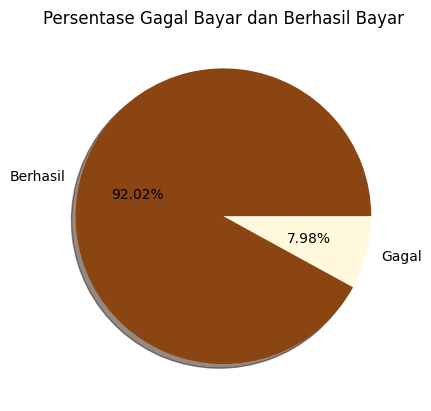

In [ ]:
sizes = data['TARGET'].value_counts()
fig1,ax1=plt.subplots()
labels = 'Berhasil', 'Gagal'
colors = '#8B4513', '#FFF8DC'
ax1.pie(sizes, labels=labels, shadow=True, autopct='%1.2f%%',colors=colors)
ax1.set_title('Persentase Gagal Bayar dan Berhasil Bayar')

plt.show()

In [ ]:
threshold=len(data)*0.5
dropcolumns = data.isna().sum()[data.isna().sum() > threshold].index
data_dropped = data.drop(columns=dropcolumns)
data = data_dropped

In [ ]:
data = data.drop('SK_ID_CURR', axis =1)

In [ ]:
data.head()


In [ ]:
data.info()

In [ ]:
kolom_numerik=data.select_dtypes(include=['number'])

kolom_non_numerik=data.select_dtypes(exclude=['number'])


In [ ]:
kolom_numerik

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21335,0,0,0,0,1,0,72000.0,450000.0,19197.0,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21336,0,0,0,1,1,0,135000.0,888840.0,35815.5,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21337,0,0,0,0,1,0,157500.0,835380.0,40320.0,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21338,0,1,1,0,1,0,225000.0,675000.0,33750.0,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
kolom_non_numerik

""
0
1
2
3
4
...
21335
21336
21337
21338


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

for kolom in kolom_non_numerik:
    data[kolom] = label_encoder.fit_transform(data[kolom])

print(data.head())

   TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  

In [ ]:
print(data.isna().sum())

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3114
AMT_REQ_CREDIT_BUREAU_WEEK    3114
AMT_REQ_CREDIT_BUREAU_MON     3114
AMT_REQ_CREDIT_BUREAU_QRT     3114
AMT_REQ_CREDIT_BUREAU_YEAR    3114
Length: 81, dtype: int64


In [ ]:
data = data.fillna(data.median())

In [ ]:
kolom_numerik_gabungan = [ 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data[kolom_numerik_gabungan])
data_scaled = pd.DataFrame(data_scaled, columns=kolom_numerik_gabungan)
print(data_scaled.head())

   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0     1.0           0.0          0.001512    0.090287     0.088480   
1     0.0           0.0          0.002089    0.311736     0.131445   
2     0.0           0.0          0.000358    0.022472     0.018353   
3     0.0           0.0          0.000935    0.066837     0.107958   
4     0.0           0.0          0.000819    0.116854     0.077404   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         0.076404                    0.253810    0.898240       0.041215   
1         0.270787                    0.041792    0.480916       0.039771   
2         0.022472                    0.131976    0.350589       0.042295   
3         0.062921                    0.104008    0.352931       0.034921   
4         0.116854                    0.390830    0.299966       0.034923   

   DAYS_REGISTRATION  ...  FLAG_OWN_REALTY  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           0.828281  ...          

In [ ]:
data = data.fillna(data.median())
data.update(data_scaled)
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,1.0,0.0,1.0,0.0,0.001512,0.090287,0.088480,0.076404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04
1,0.0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.131445,0.270787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.0,1.0,1.0,1.0,1.0,0.0,0.000358,0.022472,0.018353,0.022472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.107958,0.062921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04
4,0.0,0.0,1.0,0.0,1.0,0.0,0.000819,0.116854,0.077404,0.116854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [ ]:
data.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,2.134000e+04,2.134000e+04,21340.000000,2.134000e+04,...,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000,21340.000000
mean,0.078679,0.095970,0.340628,0.339316,0.694845,0.415651,1.737112e+05,5.993482e+05,27105.869775,5.387943e+05,...,0.007732,0.000609,0.000609,0.000469,0.006467,0.006795,0.028585,0.237207,0.229053,1.775211
std,0.269243,0.294557,0.473932,0.473488,0.460484,0.718731,8.059393e+05,4.018769e+05,14586.794762,3.693538e+05,...,0.087593,0.024675,0.024675,0.021643,0.081893,0.108674,0.184776,0.885900,0.579836,1.770023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.440000e+05,5.147775e+05,24984.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.100000e+05,34659.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,24.000000,8.000000,25.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  float64
 1   NAME_CONTRACT_TYPE            307511 non-null  float64
 2   CODE_GENDER                   307511 non-null  float64
 3   FLAG_OWN_CAR                  307511 non-null  float64
 4   FLAG_OWN_REALTY               307511 non-null  float64
 5   CNT_CHILDREN                  307511 non-null  float64
 6   AMT_INCOME_TOTAL              307511 non-null  float64
 7   AMT_CREDIT                    307511 non-null  float64
 8   AMT_ANNUITY                   307511 non-null  float64
 9   AMT_GOODS_PRICE               307511 non-null  float64
 10  NAME_TYPE_SUITE               307511 non-null  float64
 11  NAME_INCOME_TYPE              307511 non-null  float64
 12  NAME_EDUCATION_TYPE           307511 non-nul

In [ ]:
#Seleksi Fitur dengan Feature Importnce

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = data.drop('TARGET', axis=1)  #independent variable columns
y = data['TARGET']   #target variable column (price range)

model=LogisticRegression()
rfe=RFE(model,n_features_to_select=1)
fit = rfe.fit(X,y)

selected_features=X.columns[fit.support_]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: ignored

In [ ]:
data_Selected_features = data.iloc[:,10]
data_Selected_features

0        0.857143
1        0.142857
2        0.857143
3        0.857143
4        0.857143
           ...   
23277    0.857143
23278    0.857143
23279    0.857143
23280    0.857143
23281    0.857143
Name: NAME_TYPE_SUITE, Length: 23282, dtype: float64

In [ ]:
import seaborn as sns
corr =data[data_Selected_features].corr()
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.show()

NameError: ignored

In [ ]:
#Seleksi Fitur dengan Feature Importnce
X = data.drop('TARGET', axis=1)  #independent variable columns
y = data['TARGET']   #target variable column (price range)
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

#plot the graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

NameError: ignored

In [ ]:
correlation =data[feat_importances].corr()
import seaborn as sns
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, cmap='viridis')
plt.show()

KeyError: ignored

In [ ]:
#seleksi fitur dengan chisk

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.drop('TARGET', axis=1)  #independent variable columns
y = data['TARGET']   #target variable column (price range)
#extracting top 10 best features by applying SelectKBest class
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #printing 10 best features

                      Specs      Score
46           HOUSETYPE_MODE  53.126078
1               CODE_GENDER  47.882625
39             EXT_SOURCE_3  45.182694
38             EXT_SOURCE_2  44.274097
0        NAME_CONTRACT_TYPE  39.906239
35   REG_CITY_NOT_WORK_CITY  38.693769
34   REG_CITY_NOT_LIVE_CITY  34.748652
16            DAYS_EMPLOYED  28.763946
15               DAYS_BIRTH  20.395137
48      EMERGENCYSTATE_MODE  19.871098
23               FLAG_PHONE  19.630218
10         NAME_INCOME_TYPE  18.239621
55          FLAG_DOCUMENT_3  15.344819
58          FLAG_DOCUMENT_6  14.162885
36  LIVE_CITY_NOT_WORK_CITY  13.830107


In [ ]:
fiturseleksi=X.columns[bestfeatures.get_support()]
fiturseleksi

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6'],
      dtype='object')

In [ ]:
correlation =data[fiturseleksi].corr()

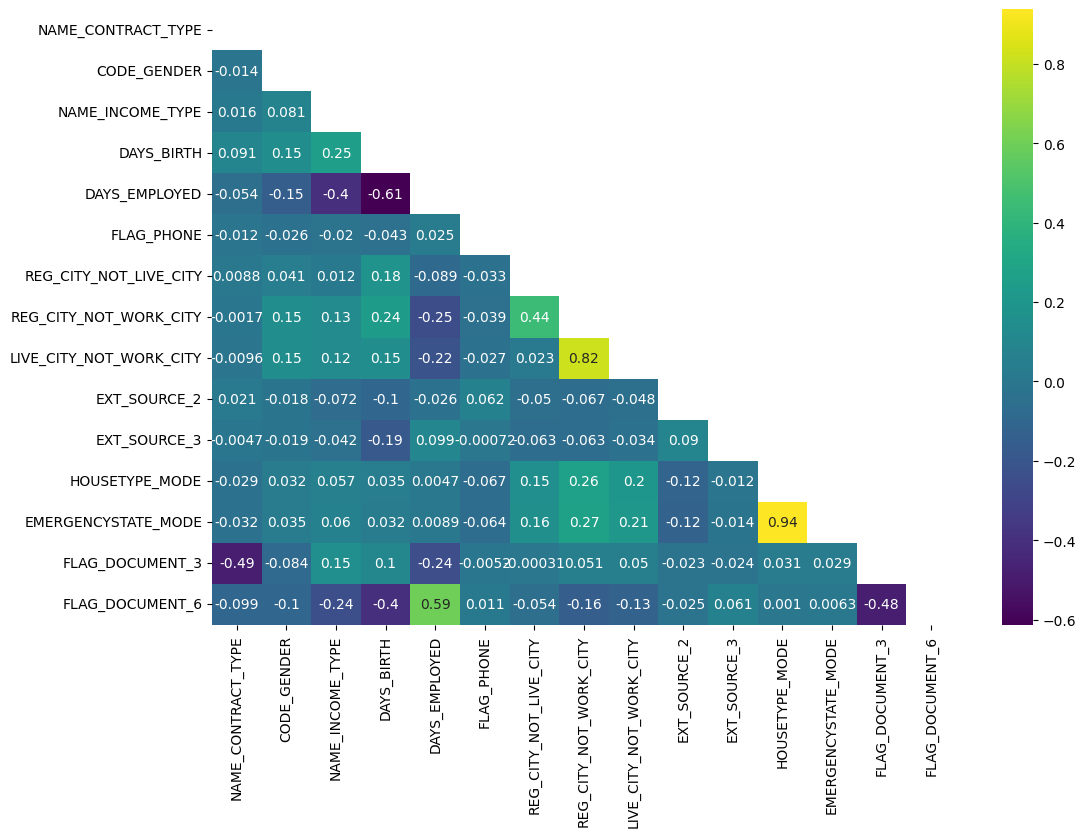

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, cmap='viridis')
plt.show()

In [ ]:
data[fiturseleksi].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6
0,0.0,1.0,1.0,0.898240,0.041215,1.0,0.0,0.0,0.0,0.307507,0.156898,0,0.0,1.0,0.0
1,0.0,0.0,0.4,0.480916,0.039771,1.0,0.0,0.0,0.0,0.727759,0.604263,0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.350589,0.042295,1.0,0.0,0.0,0.0,0.650172,0.823810,3,1.0,0.0,0.0
3,0.0,0.0,1.0,0.352931,0.034921,0.0,0.0,0.0,0.0,0.760739,0.604263,3,1.0,1.0,0.0
4,0.0,1.0,1.0,0.299966,0.034923,0.0,0.0,1.0,1.0,0.377440,0.604263,3,1.0,0.0,0.0


In [ ]:
X=data[fiturseleksi]
y=data['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 18625
Jumlah data test: 4657


In [ ]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

0.0    0.92012
1.0    0.07988
Name: TARGET, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

modellog = LogisticRegression()
modellog.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#print koefisien regresi
print("Intersep b0= ", log_regression.intercept_)
print("Koefisien b1= ", log_regression.coef_)


NameError: ignored

In [ ]:
#Menggunakan paket statsmodels untuk mendapatkan model
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
log_regression=logit_model.fit()
print(log_regression.summary())

Optimization terminated successfully.
         Current function value: 0.250737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                18625
Model:                          Logit   Df Residuals:                    18609
Method:                           MLE   Df Model:                           15
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                 0.09886
Time:                        13:02:08   Log-Likelihood:                -4670.0
converged:                       True   LL-Null:                       -5182.3
Covariance Type:            nonrobust   LLR p-value:                6.992e-209
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8360      0.184     -4.543      0.000      -1.197   

In [ ]:
#odds ratio
print(np.exp(log_regression.params))

const                      0.433426
NAME_CONTRACT_TYPE         0.598071
CODE_GENDER                1.390793
NAME_INCOME_TYPE           1.284822
DAYS_BIRTH                 1.885446
DAYS_EMPLOYED              1.183259
FLAG_PHONE                 0.794425
REG_CITY_NOT_LIVE_CITY     1.017788
REG_CITY_NOT_WORK_CITY     1.243481
LIVE_CITY_NOT_WORK_CITY    0.823808
EXT_SOURCE_2               0.142459
EXT_SOURCE_3               0.068064
HOUSETYPE_MODE             1.019251
EMERGENCYSTATE_MODE        1.078213
FLAG_DOCUMENT_3            1.352397
FLAG_DOCUMENT_6            1.218199
dtype: float64


In [ ]:
y_pred = modellog.predict(X_test)

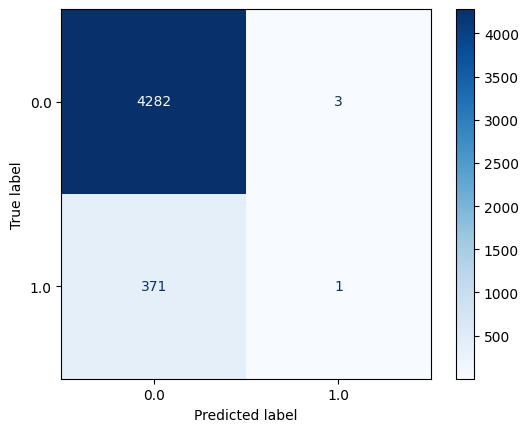

In [ ]:
#ConfusionMatrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='Blues')
plt.show()#ConfusionMatrix


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9196907880609835
Precision: 0.25
Recall: 0.002688172043010753
F1-score: 0.0053191489361702135


https://www.canva.com/design/DAF2Ax8Izbc/2SIiBLTiunSj3KtHNL1xrg/edit?utm_content=DAF2Ax8Izbc&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton